In [176]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import xgboost

In [163]:
# importing the data

df = pd.read_csv('high_diamond_ranked_10min.csv')

In [164]:
# dropping the unnecessary column

df.drop(columns = ['gameId'], inplace = True)

## Dropping highly correlated features

In [165]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (np.abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [166]:
df = correlation(df, .9)

In [167]:
# seperating the features and target variable

X = df.drop(columns = 'blueWins')
y = df['blueWins']

# EDA

In [113]:
n = 4
row_groups= [X.columns[i:i+n] for i in range(0, len(X.columns), n) ]

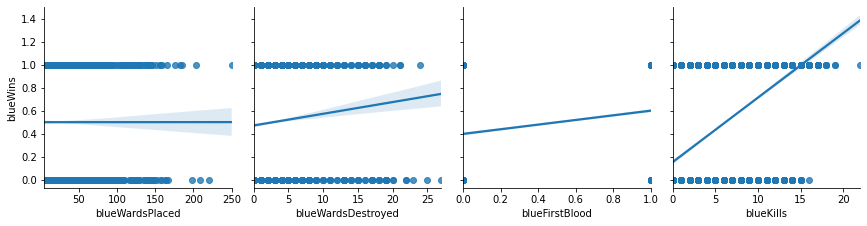

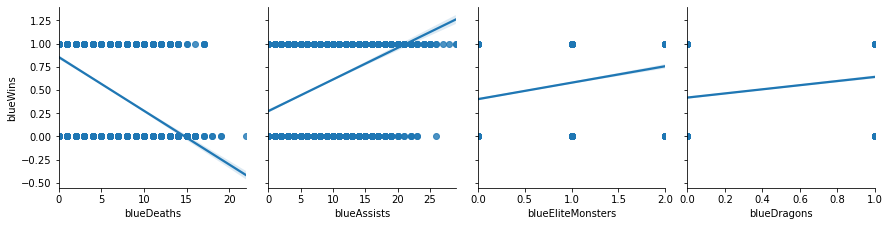

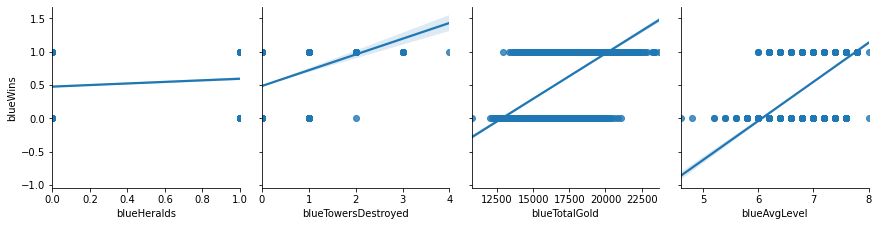

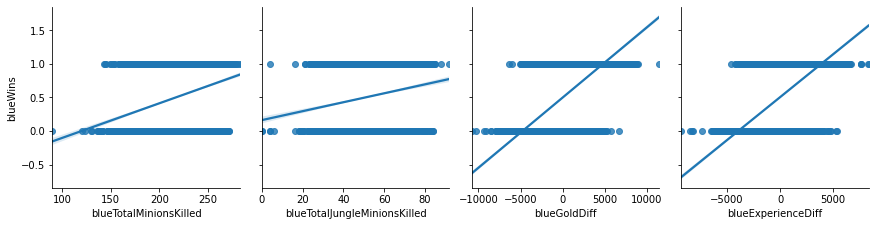

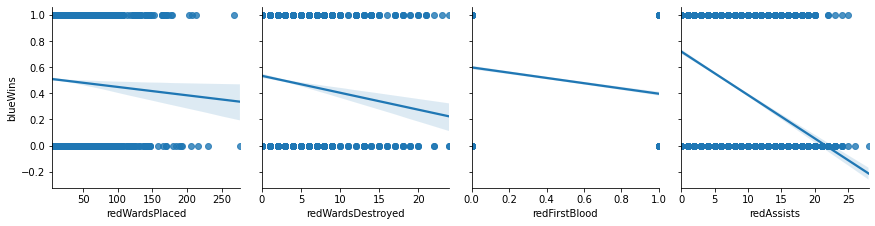

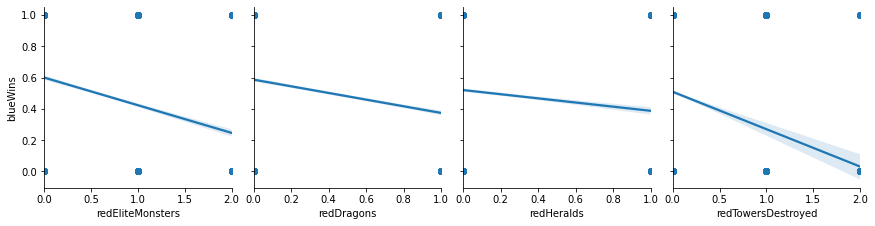

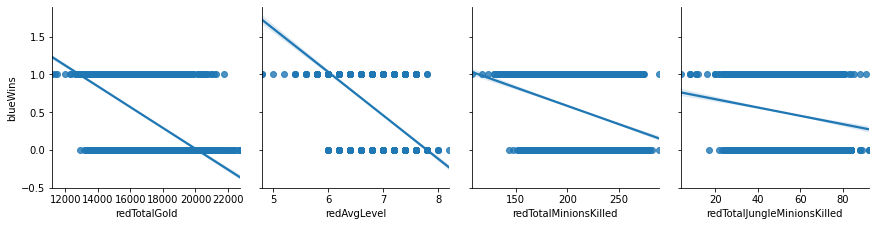

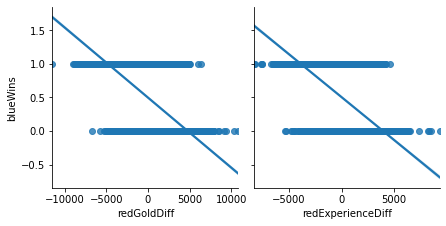

In [114]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['blueWins'], x_vars=i, kind="reg", height=3)

# Testing the data using svm and xgboost

In [151]:
# splitting the training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24, test_size = .20)

## SVM

In [152]:
svc = SVC()

In [153]:
svc.fit(X_train, y_train)

svm_preds = svc.predict(X_test)

accuracy_score(svm_preds, y_test)

0.7302631578947368

## XGB

In [154]:
xgb = xgboost.XGBClassifier()

In [155]:
xgb.fit(X_train, y_train)

xgb_preds = xgb.predict(X_test)

accuracy_score(xgb_preds, y_test)

0.7155870445344129

## Feature Engineering

In [156]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redWardsPlaced', 'redWardsDestroyed', 'redAssists', 'redEliteMonsters',
       'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold',
       'redAvgLevel', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

In [168]:
df['blueKDA'] = [(df['blueKills'][i] + df['blueAssists'][i])/df['blueDeaths'][i] for i in range(len(df['blueWins']))]
df['blueKD'] = [df['blueKills'][i] / df['blueDeaths'][i] for i in range(len(df['blueWins']))]
df['blueAD'] = [df['blueKills'][i] / df['blueDeaths'][i] for i in range(len(df['blueWins']))]


/Users/antoniohila/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in long_scalars
  """Entry point for launching an IPython kernel.
/Users/antoniohila/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in long_scalars
  
/Users/antoniohila/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [169]:
df.drop(columns = ['blueKills', 'blueDeaths', 'blueAssists', 'blueGoldDiff'], inplace = True)

In [170]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
       'blueExperienceDiff', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redTotalGold', 'redAvgLevel',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'blueKDA',
       'blueKD', 'blueAD'],
      dtype='object')

## Modeling with new data

In [174]:
# splitting the training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24, test_size = .20)

In [177]:
# scaling the data for the SVM model

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = pd.DataFrame(data=scaler.transform(X_train), columns = X.columns)
X_test_scale = pd.DataFrame(data=scaler.transform(X_test), columns = X.columns)

## SVM

In [190]:
svc = SVC(kernel='linear', C = 3, class_weight = 'balanced')

In [191]:
svc.fit(X_train_scale, y_train)

svm_preds = svc.predict(X_test_scale)

accuracy_score(svm_preds, y_test)

0.7388663967611336

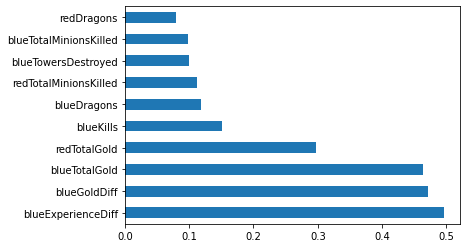

In [192]:
pd.Series(abs(svc.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')